ARIMA Model

Muyo, Mark Danielle L. <br>


## Procedures:

## Load time series data

In [ ]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults

# load data
series = read_csv('/content/data(1).csv', header=0, index_col=0)
# prepare data
X = series.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=(1,1,1))
model_fit = model.fit()
# save model
model_fit.save('model.pkl')
# load model
loaded = ARIMAResults.load('model.pkl')

In [ ]:
%matplotlib inline

import sys
import statsmodels as s
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv('/content/data(1).csv', index_col = 'Month', parse_dates = True)
data.head(5)

,CO2 (ppm)
Month,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17


## Visualize the Time Series

<Axes: xlabel='Month'>

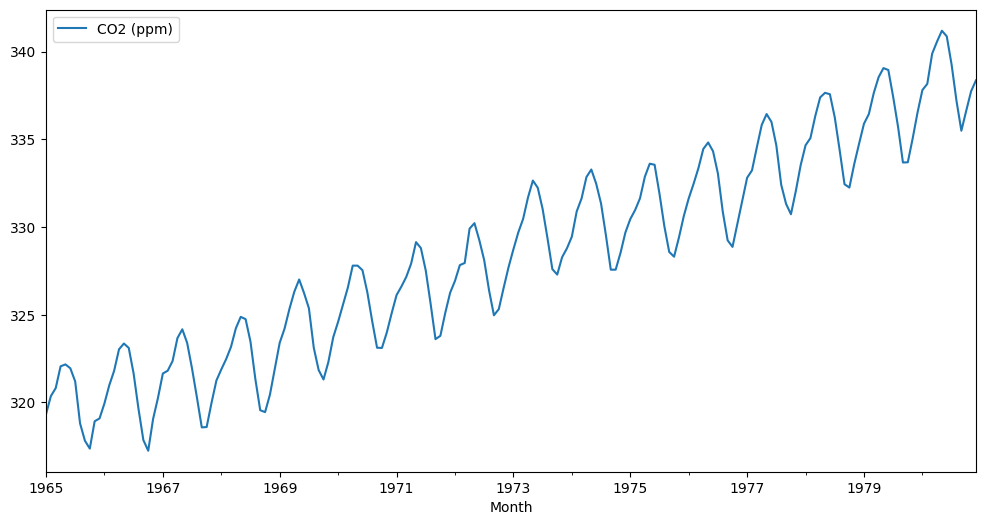

In [ ]:
data.plot(figsize=(12,6))

## Fit an ARIMA Model (baseline model order = (1,1,1))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Improve the ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1,2,3))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


## Print the model summary

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -215.841
Date:                Fri, 03 May 2024   AIC                            441.682
Time:                        23:28:30   BIC                            457.917
Sample:                    01-01-1965   HQIC                           448.259
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3825      0.140      2.724      0.006       0.107       0.658
ma.L1         -0.4704     22.759     -0.021      0.984     -45.077      44.136
ma.L2         -0.1176     11.997     -0.010      0.9

## Make a forecast (steps=10)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Splitting into train and test sets
train_size = int(len(data) * 0.75)
train_data, test_data = data[0:train_size], data[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (9,2,0))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(data), len(data)+10, typ = 'levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keywor

In [ ]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1981-01-01    338.829450
1981-02-01    339.410077
1981-03-01    339.846441
1981-04-01    339.951027
1981-05-01    339.624439
1981-06-01    338.996781
1981-07-01    338.387871
1981-08-01    338.097810
1981-09-01    338.219246
1981-10-01    338.635268
1981-11-01    339.168786
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  1.1498843083979555
RMSE:  1.0723265866320557


## Plot the forecast

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

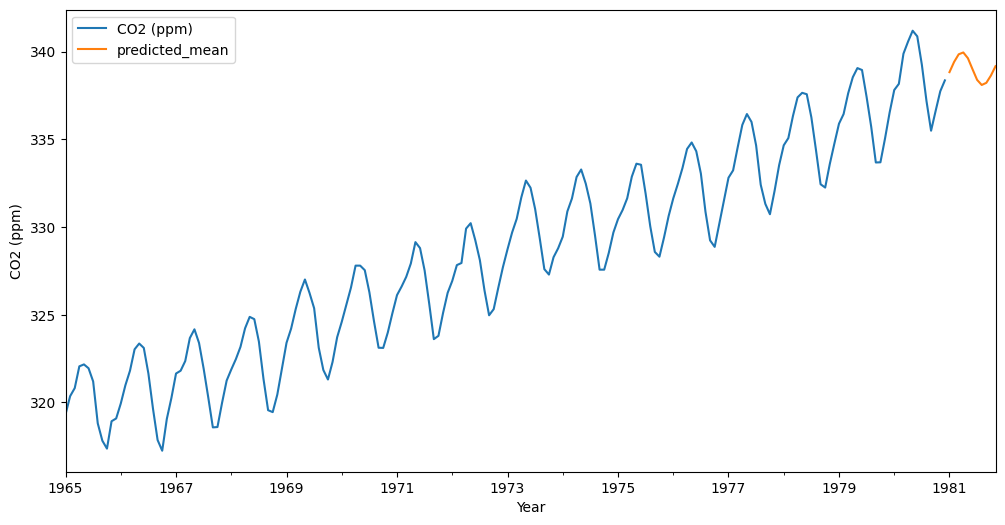

In [ ]:
ylabel='CO2 (ppm)'
xlabel='Year'

ax = data.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

## Perform a Grid Search

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(data) * 0.75)
  train_data, test_data = data[0:train_size], data[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(data), len(data)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(data, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(data.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=107.199
ARIMA(0, 0, 1) MSE=106.494
ARIMA(0, 0, 2) MSE=106.042
ARIMA(0, 0, 3) MSE=105.846
ARIMA(0, 1, 0) MSE=26.634
ARIMA(0, 1, 1) MSE=23.951
ARIMA(0, 1, 2) MSE=20.025
ARIMA(0, 1, 3) MSE=18.380
ARIMA(0, 2, 0) MSE=1059.451
ARIMA(0, 2, 1) MSE=942.369
ARIMA(0, 2, 2) MSE=998.307
ARIMA(0, 2, 3) MSE=6.025
ARIMA(0, 3, 0) MSE=1432.028
ARIMA(0, 3, 1) MSE=1128.208
ARIMA(0, 3, 2) MSE=945.481
ARIMA(0, 3, 3) MSE=1022.852
ARIMA(1, 0, 0) MSE=62.368
ARIMA(1, 0, 1) MSE=72.465
ARIMA(1, 0, 2) MSE=81.394
ARIMA(1, 0, 3) MSE=91.863
ARIMA(1, 1, 0) MSE=8.619
ARIMA(1, 1, 1) MSE=13.928
ARIMA(1, 1, 2) MSE=14.918
ARIMA(1, 1, 3) MSE=18.170
ARIMA(1, 2, 0) MSE=1065.125
ARIMA(1, 2, 1) MSE=1008.356
ARIMA(1, 2, 2) MSE=4.099
ARIMA(1, 2, 3) MSE=4.275
ARIMA(1, 3, 0) MSE=75819.084
ARIMA(1, 3, 1) MSE=1087.634
ARIMA(1, 3, 2) MSE=1026.289
ARIMA(1, 3, 3) MSE=1016.551
ARIMA(2, 0, 0) MSE=97.612
ARIMA(2, 0, 1) MSE=95.559
ARIMA(2, 0, 2) MSE=94.688
ARIMA(2, 0, 3) MSE=36.992
ARIMA(2, 1, 0) MSE=23.998
ARIMA(2, 1, 1)

## Forecasting with best parameters according to Grid Search

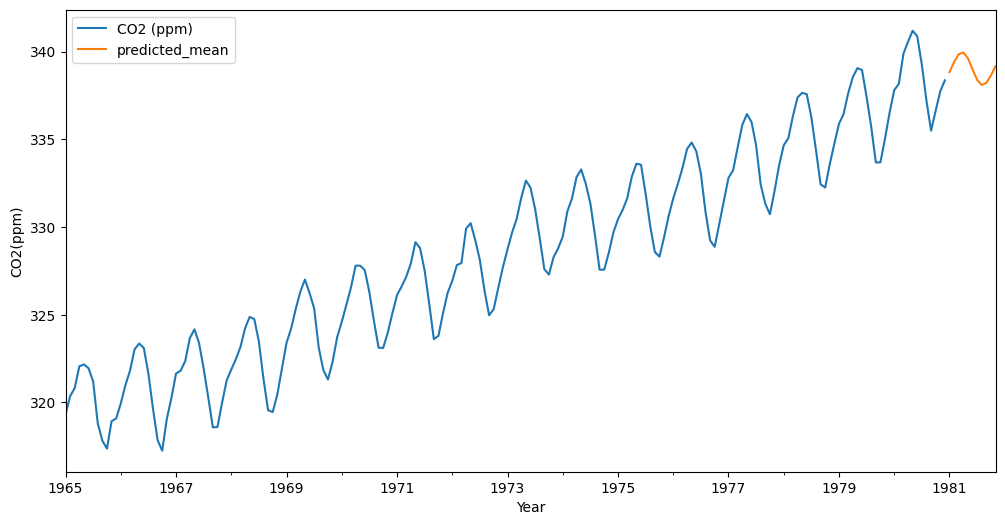

In [ ]:
# Splitting into train and test sets
train_size = int(len(data) * 0.75)
train_data, test_data = data[0:train_size], data[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (9,2,0))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(data), len(data)+10, typ = 'levels')

ylabel='CO2(ppm)'
xlabel='Year'

ax = data.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

## Supplementary Activity

In [ ]:
filepath2 = '/content/dataset_temperature.csv'

In [ ]:
import pandas as pd

# Read CSV as DataFrame
df = pd.read_csv(filepath2, header=0, index_col=0, parse_dates=True)

# Convert DataFrame to Series
series = df.squeeze()


In [ ]:
series = series.drop([series.index[-1], series.index[-2]]).astype(float)

In [ ]:
series

Month
1907-01    33.3
1907-02    46.0
1907-03    43.0
1907-04    55.0
1907-05    51.8
           ... 
1972-08    75.6
1972-09    64.1
1972-10    51.7
1972-11    40.3
1972-12    30.3
Name: Mean monthly temperature, Length: 792, dtype: float64

## Visualize the time series

Month
1907-01    33.3
1907-02    46.0
1907-03    43.0
1907-04    55.0
1907-05    51.8
Name: Mean monthly temperature, dtype: float64


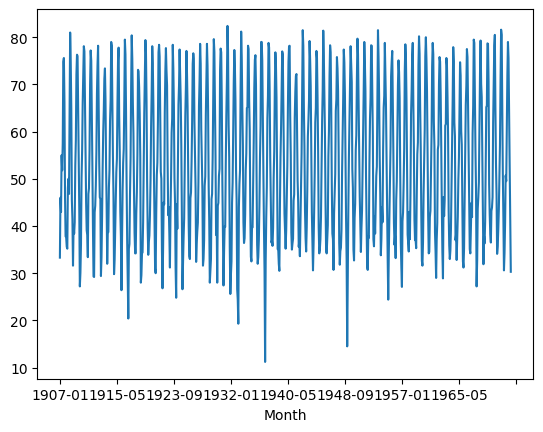

In [ ]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot

print(series.head())
series.plot()
pyplot.show()


In [ ]:
series

Month
1907-01    33.3
1907-02    46.0
1907-03    43.0
1907-04    55.0
1907-05    51.8
           ... 
1972-08    75.6
1972-09    64.1
1972-10    51.7
1972-11    40.3
1972-12    30.3
Name: Mean monthly temperature, Length: 792, dtype: float64

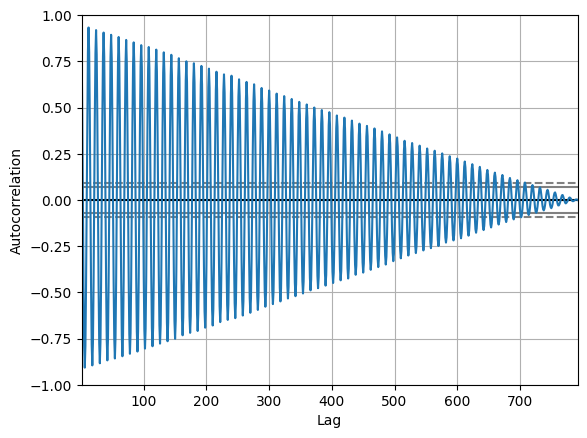

In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

autocorrelation_plot(series)
pyplot.show()


## Fit an ARIMA Model (baseline model order = (1,1,1))

In [ ]:
# fit an ARIMA model and plot residual errors
from datetime import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
# def parser(x):
# 	return datetime.strptime('190'+x, '%Y-%m')
# series = read_csv(filepath, header=0, index_col=0, parse_dates=True, squeeze=True)
# series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit()


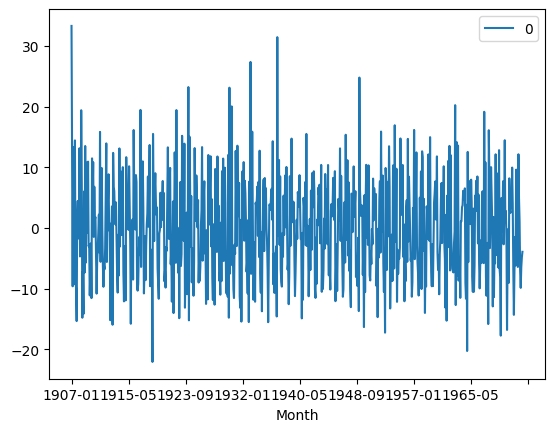

In [ ]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()


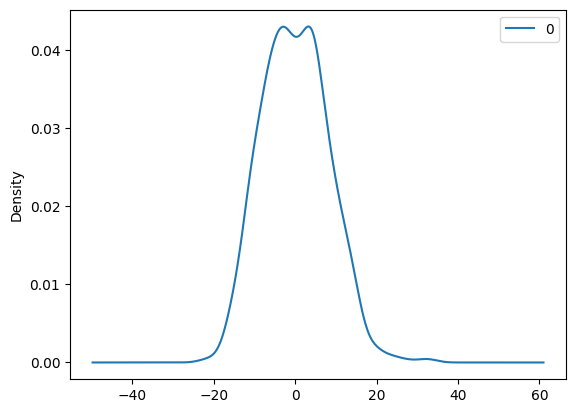

In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
# summary stats of residuals
print(residuals.describe())

                0
count  792.000000
mean     0.033157
std      8.152946
min    -22.090284
25%     -5.966691
50%     -0.197062
75%      5.394914
max     33.300000


In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# def parser(x):
# 	return datetime.strptime('190'+x, '%Y-%m')
# series = read_csv(filepath, header=0, index_col=0, parse_dates=True, squeeze=True)
# series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


predicted=77.505075, expected=79.700000
predicted=84.177160, expected=76.400000
predicted=74.865890, expected=66.200000
predicted=60.965321, expected=57.100000
predicted=52.310315, expected=46.300000
predicted=40.642847, expected=40.400000
predicted=37.218867, expected=34.500000
predicted=31.389591, expected=39.500000
predicted=41.958056, expected=43.200000
predicted=45.160045, expected=51.700000
predicted=56.098621, expected=60.700000
predicted=65.433738, expected=69.000000
predicted=73.391986, expected=79.000000
predicted=84.262976, expected=74.700000
predicted=72.659397, expected=68.600000
predicted=65.419755, expected=50.700000
predicted=41.416033, expected=41.300000
predicted=36.205526, expected=31.300000
predicted=26.004063, expected=30.700000
predicted=30.234937, expected=37.900000
predicted=41.586028, expected=37.500000
predicted=37.399168, expected=53.300000
predicted=61.388803, expected=62.700000
predicted=67.768511, expected=67.200000
predicted=69.662138, expected=78.300000


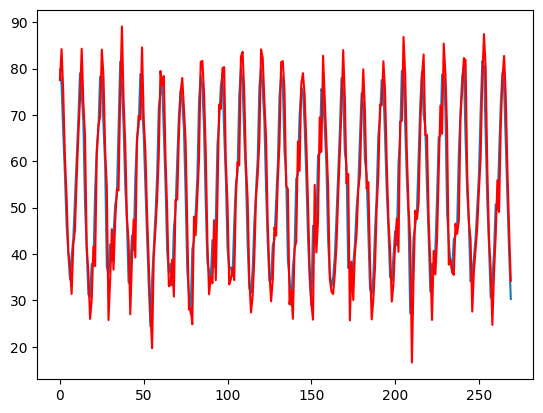

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# summary of fit model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  791
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2770.470
Date:                Fri, 03 May 2024   AIC                           5546.940
Time:                        23:31:37   BIC                           5560.956
Sample:                             0   HQIC                          5552.328
                                - 791                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5448      0.060      9.062      0.000       0.427       0.663
ma.L1         -0.0328      0.072     -0.455      0.649      -0.174       0.109
sigma2        65.0783      3.532     18.423      0.0

## Improve the ARIMA Model

In [ ]:
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
model = ARIMA(history, order=(2,2,2))
model_fit = model.fit()

## Print the model summary

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  792
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -2841.333
Date:                Fri, 03 May 2024   AIC                           5692.666
Time:                        23:31:38   BIC                           5716.026
Sample:                             0   HQIC                          5701.645
                                - 792                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1457      0.094      1.549      0.121      -0.039       0.330
ar.L2         -0.5169      0.081     -6.412      0.000      -0.675      -0.359
ma.L1         -0.3571      0.081     -4.408      0.0

## Make a forecast (steps=10)

In [ ]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,2,2))
	model_fit = model.fit()
	output = model_fit.forecast(steps=10)
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


predicted=81.890690, expected=79.700000
predicted=89.003360, expected=76.400000
predicted=76.387382, expected=66.200000
predicted=56.100160, expected=57.100000
predicted=44.247637, expected=46.300000
predicted=34.360147, expected=40.400000
predicted=35.572760, expected=34.500000
predicted=30.720831, expected=39.500000
predicted=42.417025, expected=43.200000
predicted=46.520377, expected=51.700000
predicted=60.425709, expected=60.700000
predicted=70.787658, expected=69.000000
predicted=77.813825, expected=79.000000
predicted=87.946925, expected=74.700000
predicted=72.688465, expected=68.600000
predicted=62.181498, expected=50.700000
predicted=32.951859, expected=41.300000
predicted=28.499261, expected=31.300000
predicted=21.314576, expected=30.700000
predicted=30.734647, expected=37.900000
predicted=45.482694, expected=37.500000
predicted=39.632435, expected=53.300000
predicted=65.373834, expected=62.700000
predicted=72.718107, expected=67.200000
predicted=74.609545, expected=78.300000


In [ ]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1981-01-01    338.829450
1981-02-01    339.410077
1981-03-01    339.846441
1981-04-01    339.951027
1981-05-01    339.624439
1981-06-01    338.996781
1981-07-01    338.387871
1981-08-01    338.097810
1981-09-01    338.219246
1981-10-01    338.635268
1981-11-01    339.168786
Freq: MS, Name: predicted_mean, dtype: float64


## Plot the forecast

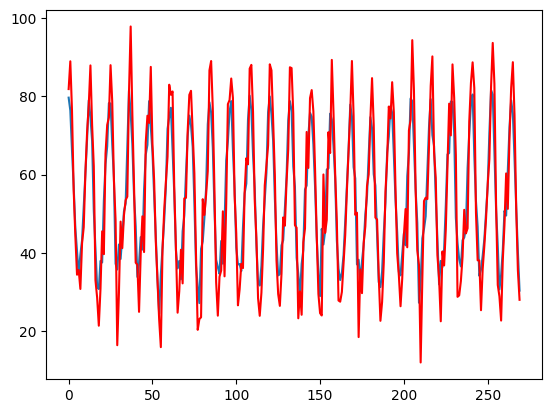

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# summary of fit model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  791
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -2838.200
Date:                Fri, 03 May 2024   AIC                           5686.401
Time:                        23:33:50   BIC                           5709.755
Sample:                             0   HQIC                          5695.378
                                - 791                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1458      0.094      1.548      0.122      -0.039       0.330
ar.L2         -0.5170      0.081     -6.406      0.000      -0.675      -0.359
ma.L1         -0.3575      0.081     -4.407      0.0

## Perform a grid search

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
# evaluate parameters
p_values = [0, 1, 2, 4]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=244.071
ARIMA(0, 0, 1) MSE=104.668
ARIMA(0, 0, 2) MSE=69.392
ARIMA(0, 1, 0) MSE=86.206
ARIMA(0, 1, 1) MSE=68.479
ARIMA(0, 1, 2) MSE=61.752
ARIMA(0, 2, 0) MSE=80.907
ARIMA(0, 2, 1) MSE=76.168
ARIMA(0, 2, 2) MSE=74.546
ARIMA(1, 0, 0) MSE=78.890
ARIMA(1, 0, 1) MSE=59.953
ARIMA(1, 0, 2) MSE=52.520
ARIMA(1, 1, 0) MSE=61.962
ARIMA(1, 1, 1) MSE=61.959
ARIMA(1, 1, 2) MSE=59.963
ARIMA(1, 2, 0) MSE=75.309
ARIMA(1, 2, 1) MSE=75.218
ARIMA(1, 2, 2) MSE=67.206
ARIMA(2, 0, 0) MSE=42.500
ARIMA(2, 0, 1) MSE=24.004
ARIMA(2, 1, 0) MSE=61.959
ARIMA(2, 1, 1) MSE=61.436
ARIMA(2, 1, 2) MSE=24.336
ARIMA(2, 2, 0) MSE=75.151
ARIMA(2, 2, 1) MSE=63.805
ARIMA(2, 2, 2) MSE=73.622
ARIMA(4, 0, 0) MSE=25.995
ARIMA(4, 0, 1) MSE=21.227
ARIMA(4, 0, 2) MSE=41.112
ARIMA(4, 1, 0) MSE=47.112
ARIMA(4, 1, 1) MSE=26.001
ARIMA(4, 1, 2) MSE=20.988
ARIMA(4, 2, 0) MSE=73.707
ARIMA(4, 2, 1) MSE=47.194
Best ARIMA(4, 1, 2) MSE=20.988


In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# def parser(x):
# 	return datetime.strptime('190'+x, '%Y-%m')
# series = read_csv(filepath, header=0, index_col=0, parse_dates=True, squeeze=True)
# series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=71.382409, expected=79.700000
predicted=72.458622, expected=76.400000
predicted=65.953811, expected=66.200000
predicted=54.957740, expected=57.100000
predicted=44.301197, expected=46.300000
predicted=35.308789, expected=40.400000
predicted=34.263976, expected=34.500000
predicted=35.605994, expected=39.500000
predicted=44.685322, expected=43.200000
predicted=51.356360, expected=51.700000
predicted=61.437583, expected=60.700000
predicted=66.694220, expected=69.000000
predicted=71.420571, expected=79.000000
predicted=76.299486, expected=74.700000
predicted=68.437863, expected=68.600000
predicted=59.234404, expected=50.700000
predicted=41.604408, expected=41.300000
predicted=35.690282, expected=31.300000
predicted=31.044097, expected=30.700000
predicted=36.394414, expected=37.900000
predicted=47.009749, expected=37.500000
predicted=52.191162, expected=53.300000
predicted=66.277402, expected=62.700000
predicted=70.237119, expected=67.200000
predicted=73.234552, expected=78.300000


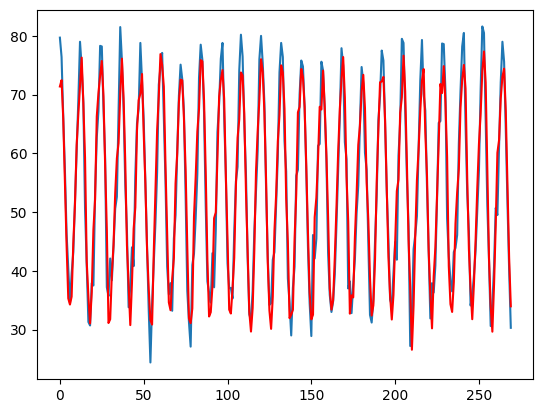

In [ ]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Conclusion

To conclude, the first step in creating an ARIMA (Autoregressive Integrated Moving Average) model is to load time series data, such as from the provided data.csv file. Visualizing timeline data is essential to gaining an understanding of current patterns and trends. The original ARIMA model can then be fitted, using a suitable initial order such as (1,1,1). This initial model can be improved by setting the system parameters p, d, and q to determine the best fit to the data. Once materials have been transferred to the final model, a summary must be published to track model design and performance metrics. The model can then be used to predict a specific number of future time steps, such as 10 steps forward. This forecast should be simulated to visualize the predicted results. Finally, a grid search can be performed to systematically evaluate different configurations and select the overall best-fitting model according to information criteria such as AIC or BIC After this step, ARIMA is obtained a very fitting example.

For the supplementary activity, we made use of two datasets, one of which is the dataset_temperature.csv . First, I loaded the datasets and visualized the time series datasets. Next, I fitted an ARIMA model of order (1,1,1). Afterwhich, I created an improved model with order (2,2,2) and printed its model summary. Then, I forecasted using the model steps=10 and plotted the results of the forecast. Lastly, I used a grid search in order to identify the best order to be utilized in creating the best model for forecasting the given data. The grid search on the second dataset identified a best set of parameters (4,1,2) with an RMSE of 4.580.